# PROJECT TRAFFIC SIGN CLASSIFICATION (USING LE-NET)

- In this case study,We are  provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')


# STEP 1 - IMPORT DATA

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pickle
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
print(X_train.shape," ",y_train.shape)
print(X_validation.shape," ",y_validation.shape)
print(X_test.shape," ",y_test.shape)

(34799, 32, 32, 3)   (34799,)
(4410, 32, 32, 3)   (4410,)
(12630, 32, 32, 3)   (12630,)


# IMAGE EXPLORATION

31


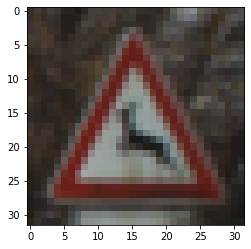

In [5]:
i=897
plt.imshow(X_train[i])
print(y_train[i])
    

## DATA PREPARATION 
- Shuffle
- Convert to grayscale
- Normalize

In [6]:
from sklearn.utils import shuffle
(X_train,y_train)=shuffle(X_train,y_train)

In [7]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [8]:
print(X_train_gray.shape," ",X_test_gray.shape," ",X_validation_gray.shape)

(34799, 32, 32, 1)   (12630, 32, 32, 1)   (4410, 32, 32, 1)


In [9]:
# 3) NORMALIZE
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


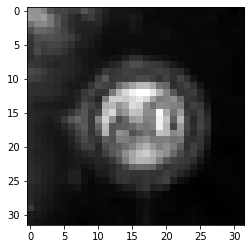

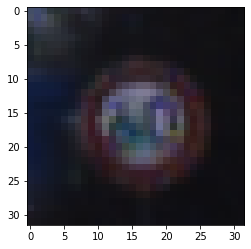

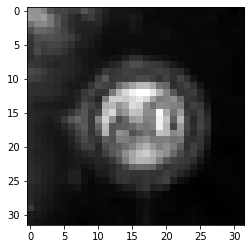

In [10]:
i = 597
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(),cmap='gray')


## MODEL TRAINING 


In [11]:
from keras import Sequential
from keras.layers import *
from keras.optimizers import Adam

Using TensorFlow backend.


In [12]:
# LE-NET
model=Sequential()
model.add(Conv2D(filters=6,kernel_size=(5,5),input_shape=(32,32,1),activation='relu'))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(84 ,activation='relu'))
model.add(Dense(43 ,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
# Compile
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

In [14]:
# Fit
hist=model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        nb_epoch=70,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Instructions for updating:
Use tf.cast instead.


C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 34799 samples, validate on 4410 samples
Epoch 1/70
34799/34799 [==============================] - 21s 618us/step - loss: 3.0686 - acc: 0.2062 - val_loss: 2.4831 - val_acc: 0.3234
Epoch 2/70
34799/34799 [==============================] - 19s 550us/step - loss: 1.5237 - acc: 0.5716 - val_loss: 1.2326 - val_acc: 0.6492
Epoch 3/70
34799/34799 [==============================] - 19s 553us/step - loss: 0.8631 - acc: 0.7577 - val_loss: 0.9641 - val_acc: 0.7170
Epoch 4/70
34799/34799 [==============================] - 19s 557us/step - loss: 0.6205 - acc: 0.8317 - val_loss: 0.8077 - val_acc: 0.7617
Epoch 5/70
34799/34799 [==============================] - 19s 559us/step - loss: 0.4973 - acc: 0.8671 - val_loss: 0.7223 - val_acc: 0.7900
Epoch 6/70
34799/34799 [==============================] - 19s 552us/step - loss: 0.4136 - acc: 0.8908 - val_loss: 0.6764 - val_acc: 0.8048
Epoch 7/70
34799/34799 [==============================] - 19s 559us/step - loss: 0.3553 - acc: 0.9060 - val_loss: 0.6

## MODEL EVALUATION

In [15]:
score = model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8813


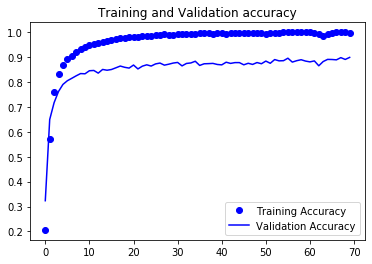

In [16]:
accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

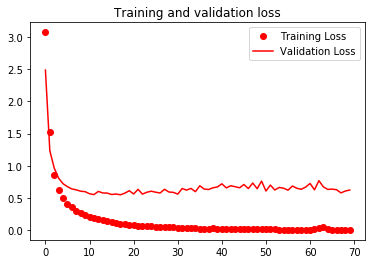

In [17]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


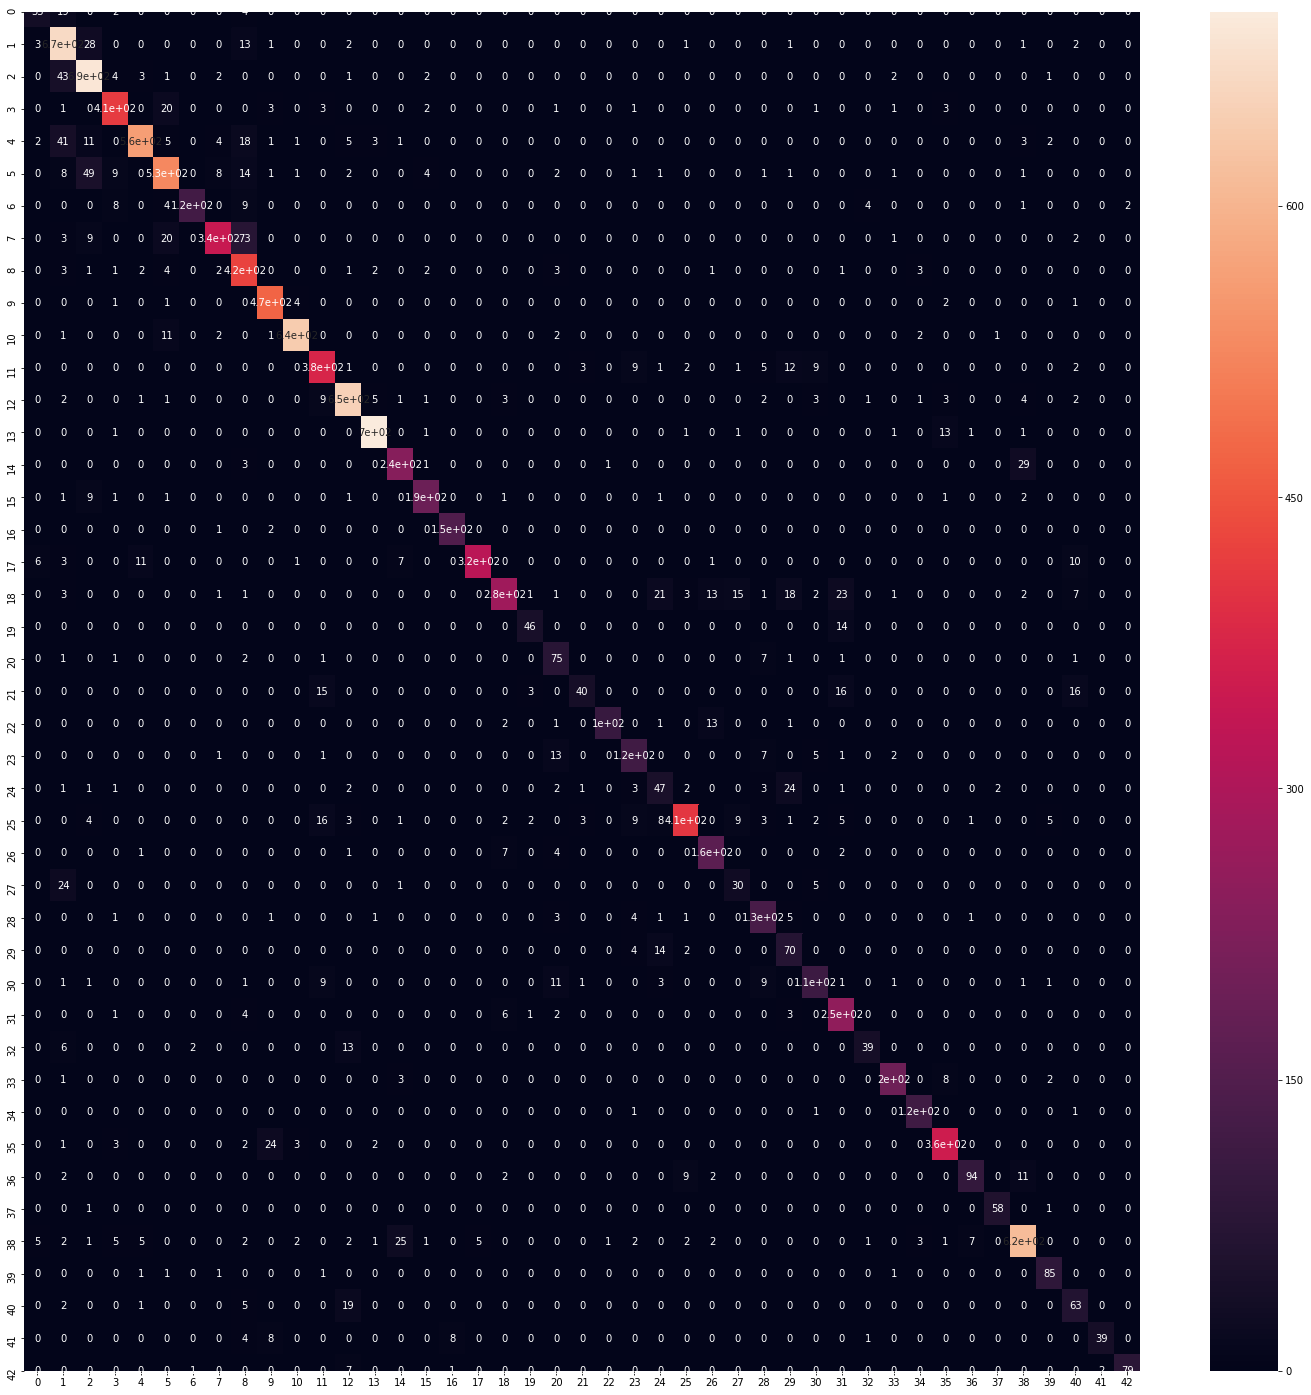

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)